In [10]:
#coding:utf-8
%matplotlib inline
'''
使用模糊集合进行灰度变换
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

src = cv2.cvtColor(cv2.imread('datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [11]:
def fuzzy_knowledge(intensity):
    if intensity < 0.27:
        dark = 1.0
    elif intensity >= 0.5:
        dark = 0.0
    else:
        dark = (0.5 - intensity) / 0.22
    
    if intensity >= 0.72:
        brig = 1
    elif intensity <= 0.5:
        brig = 0
    else:
        brig = (intensity - 0.5) / 0.22
        
    if intensity >= 0.72:
        gray = 0.0
    elif intensity <= 0.27:
        gray = 0.0
    elif intensity <= 0.5:
        gray = (intensity - 0.27) / 0.22
    else:
        gray = (0.72 - intensity) / 0.22
      
    return dark,gray,brig
    

In [19]:
def fuzzy_knowledge_gray(src):
    rows,cols = src.shape
    dst = np.zeros((rows,cols),dtype=np.float64)
    for y in range(rows):
        for x in range(cols):
            pixel = src[y,x] / 255.0
            dark,gray,brig = fuzzy_knowledge(pixel)
            dst[y,x] = ((dark * 0) + (gray * 0.5) + (brig * 1 )) / (dark + gray + brig)
    dst = dst * 255
    dst = cv2.convertScaleAbs(dst)
    return dst

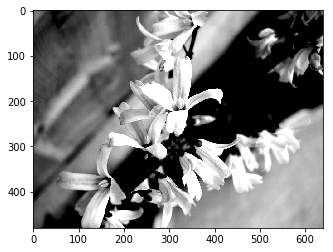

In [21]:
dst = fuzzy_knowledge_gray(gray)
plt.imshow(dst,cmap='gray')

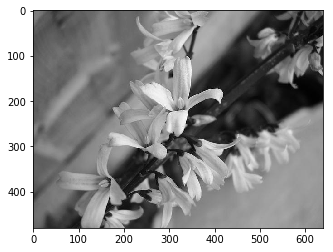

In [22]:
plt.imshow(gray,cmap='gray')